In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def data_read(path):
    
    df = pd.read_csv(path)
    df.dropna(inplace=True)
    df.set_index('LABELS', inplace=True)
    df.index.unique()
    unwanted = ['BRICKFACE', 'FOLIAGE', 'SKY', 'WINDOW', 'PATH']
    df.drop(unwanted, inplace=True)
    
    labels_dict = {'CEMENT'  : 1,
                   'GRASS': -1}
    
    Y = np.array(df.index.map(labels_dict))
    X = np.array(df.reset_index().drop('LABELS',axis = 1))
    
    return X,Y

In [3]:
def activation(x,weights,bias):
    return np.dot(x,weights) + bias

In [4]:
def model_fit(X_train,y_train,epochs):
    shuffler = np.random.permutation(len(y_train))
    X_train = X_train[shuffler]
    y_train = y_train[shuffler]
    datapoints_len, weights_len = X_train.shape
    weights = np.zeros(weights_len)
    bias = 0
    
    weightsEpoch = np.zeros((epochs,weights_len))
    biasEpoch = np.zeros(epochs)
    
    for epoch in range(epochs):
        for feature in range(datapoints_len):
            x = X_train[feature]
            y = y_train[feature]
            a = activation(x, weights, bias)

            if y*a<=0:
                weights = weights + y*x
                bias += y
        
        weightsEpoch[epoch] = weights
        biasEpoch[epoch] = bias
                
    return weights, bias, weightsEpoch, biasEpoch

In [5]:
def accuracy(X, Y, weights, bias):
    y_predicted = list(map(lambda i: np.sign(activation(i,weights,bias)),X))
    accuracy = np.sum(y_predicted*Y)/len(y_predicted*Y)
    return accuracy


In [31]:
X_train,y_train = data_read("segmentation-train.csv")
epochs = 25
weights, bias, weightsEpoch, biasEpoch = model_fit(X_train,y_train,epochs)

In [32]:
train_accuracy = accuracy(X_train, y_train, weights, bias)
train_accuracy

1.0

In [33]:
X_test,y_test = data_read("segmentation-test.csv")
test_accuracy = accuracy(X_test, y_test, weights, bias)
test_accuracy

0.9766666666666667

In [34]:
accuracyEpochWise = [accuracy(X_test, y_test, weightsEpoch[i], biasEpoch[i]) for i in range(epochs)]

Text(0, 0.5, 'accuracy')

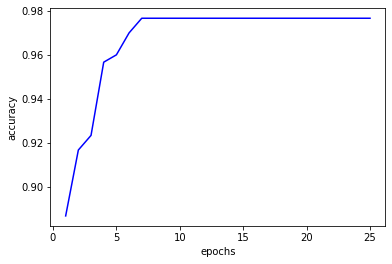

In [35]:
plt.plot(np.arange(1,epochs+1),accuracyEpochWise,'-b')
plt.xlabel("epochs")
plt.ylabel("accuracy")